### CREDIT CARD FRAUD DETCTION

It is important that credit card companies are able to recognize fraudulent credit card transactions so that customers are not charged for items that they did not purchase

In [1]:
# import required libraries

import pandas as pd
import numpy as np
from matplotlib import pyplot
import seaborn as sns

In [2]:
# importing dataset
df = pd.read_csv('creditcard.csv')

In [3]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
#check number of records and features in dataset 
df.shape

(284807, 31)

In [5]:
#check feature datatype
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [6]:
# Basic statistics report of dataset
pd.set_option('precision',2)
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.00,2.85e+05,2.85e+05,2.85e+05,2.85e+05,2.85e+05,2.85e+05,2.85e+05,2.85e+05,2.85e+05,...,2.85e+05,2.85e+05,2.85e+05,2.85e+05,2.85e+05,2.85e+05,2.85e+05,2.85e+05,284807.00,2.85e+05
mean,94813.86,3.92e-15,5.69e-16,-8.77e-15,2.78e-15,-1.55e-15,2.01e-15,-1.69e-15,-1.93e-16,-3.14e-15,...,1.54e-16,7.96e-16,5.37e-16,4.46e-15,1.45e-15,1.70e-15,-3.66e-16,-1.21e-16,88.35,1.73e-03
std,47488.15,1.96e+00,1.65e+00,1.52e+00,1.42e+00,1.38e+00,1.33e+00,1.24e+00,1.19e+00,1.10e+00,...,7.35e-01,7.26e-01,6.24e-01,6.06e-01,5.21e-01,4.82e-01,4.04e-01,3.30e-01,250.12,4.15e-02
min,0.00,-5.64e+01,-7.27e+01,-4.83e+01,-5.68e+00,-1.14e+02,-2.62e+01,-4.36e+01,-7.32e+01,-1.34e+01,...,-3.48e+01,-1.09e+01,-4.48e+01,-2.84e+00,-1.03e+01,-2.60e+00,-2.26e+01,-1.54e+01,0.00,0.00e+00
25%,54201.50,-9.20e-01,-5.99e-01,-8.90e-01,-8.49e-01,-6.92e-01,-7.68e-01,-5.54e-01,-2.09e-01,-6.43e-01,...,-2.28e-01,-5.42e-01,-1.62e-01,-3.55e-01,-3.17e-01,-3.27e-01,-7.08e-02,-5.30e-02,5.60,0.00e+00
50%,84692.00,1.81e-02,6.55e-02,1.80e-01,-1.98e-02,-5.43e-02,-2.74e-01,4.01e-02,2.24e-02,-5.14e-02,...,-2.95e-02,6.78e-03,-1.12e-02,4.10e-02,1.66e-02,-5.21e-02,1.34e-03,1.12e-02,22.00,0.00e+00
75%,139320.50,1.32e+00,8.04e-01,1.03e+00,7.43e-01,6.12e-01,3.99e-01,5.70e-01,3.27e-01,5.97e-01,...,1.86e-01,5.29e-01,1.48e-01,4.40e-01,3.51e-01,2.41e-01,9.10e-02,7.83e-02,77.16,0.00e+00
max,172792.00,2.45e+00,2.21e+01,9.38e+00,1.69e+01,3.48e+01,7.33e+01,1.21e+02,2.00e+01,1.56e+01,...,2.72e+01,1.05e+01,2.25e+01,4.58e+00,7.52e+00,3.52e+00,3.16e+01,3.38e+01,25691.16,1.00e+00


In [7]:
# checking null values in data
df.isna().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [8]:
# check class imbalance count
df.Class.value_counts()

0    284315
1       492
Name: Class, dtype: int64

 Here 0=Not Fraud Transaction, 1=Fraud Transaction
 It is showing it is a complete imbalance dataset
 
 The data set has 284315 normal transactions with 492 fraudelent cases

In [9]:
df.Class.sum()

492

In [10]:
# check correlation between features
pd.set_option('precision',2)
correlation = df.corr(method='pearson')
correlation

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
Time,1.00e+00,1.17e-01,-1.06e-02,-4.20e-01,-1.05e-01,1.73e-01,-6.30e-02,8.47e-02,-3.69e-02,-8.66e-03,...,4.47e-02,1.44e-01,5.11e-02,-1.62e-02,-2.33e-01,-4.14e-02,-5.13e-03,-9.41e-03,-1.06e-02,-1.23e-02
V1,1.17e-01,1.00e+00,4.70e-17,-1.42e-15,1.76e-17,6.39e-17,2.40e-16,1.99e-15,-9.49e-17,2.17e-16,...,-1.76e-16,7.48e-17,9.81e-16,7.35e-17,-9.81e-16,-8.62e-17,3.21e-17,9.82e-16,-2.28e-01,-1.01e-01
V2,-1.06e-02,4.70e-17,1.00e+00,2.51e-16,-1.13e-16,-2.04e-16,5.02e-16,3.97e-16,-4.41e-17,-5.73e-17,...,8.44e-17,2.50e-16,1.06e-16,-8.14e-18,-4.26e-17,2.60e-16,-4.48e-16,-3.68e-16,-5.31e-01,9.13e-02
V3,-4.20e-01,-1.42e-15,2.51e-16,1.00e+00,-3.42e-16,-1.44e-15,1.43e-15,2.17e-15,3.43e-16,-4.23e-16,...,-2.97e-17,4.65e-16,2.12e-17,-9.35e-17,4.77e-16,6.52e-16,6.24e-16,7.73e-16,-2.11e-01,-1.93e-01
V4,-1.05e-01,1.76e-17,-1.13e-16,-3.42e-16,1.00e+00,-1.94e-15,-2.71e-16,1.56e-16,5.20e-16,3.86e-16,...,-9.98e-17,2.10e-16,6.00e-17,2.23e-16,5.39e-16,-6.18e-16,-6.40e-17,-5.86e-17,9.87e-02,1.33e-01
V5,1.73e-01,6.39e-17,-2.04e-16,-1.44e-15,-1.94e-15,1.00e+00,7.93e-16,-4.21e-16,7.59e-16,4.21e-16,...,-1.37e-16,5.06e-16,1.64e-16,-9.29e-16,5.63e-16,9.14e-16,4.47e-16,-3.30e-16,-3.86e-01,-9.50e-02
V6,-6.30e-02,2.40e-16,5.02e-16,1.43e-15,-2.71e-16,7.93e-16,1.00e+00,1.43e-16,-1.71e-16,1.11e-16,...,-1.58e-16,-3.36e-16,-7.23e-17,-1.26e-15,1.08e-15,-2.38e-16,-2.62e-16,4.81e-16,2.16e-01,-4.36e-02
V7,8.47e-02,1.99e-15,3.97e-16,2.17e-15,1.56e-16,-4.21e-16,1.43e-16,1.00e+00,-8.69e-17,7.93e-16,...,1.94e-16,-1.06e-15,2.33e-16,-2.59e-17,1.17e-15,-7.33e-16,-5.89e-16,-6.84e-17,3.97e-01,-1.87e-01
V8,-3.69e-02,-9.49e-17,-4.41e-17,3.43e-16,5.20e-16,7.59e-16,-1.71e-16,-8.69e-17,1.00e+00,2.90e-16,...,-2.41e-16,5.48e-16,3.90e-16,-1.80e-16,-1.39e-16,-1.21e-16,1.73e-16,-4.48e-16,-1.03e-01,1.99e-02
V9,-8.66e-03,2.17e-16,-5.73e-17,-4.23e-16,3.86e-16,4.21e-16,1.11e-16,7.93e-16,2.90e-16,1.00e+00,...,4.58e-17,2.87e-17,5.93e-16,-2.35e-16,1.10e-15,-1.39e-15,-2.29e-16,9.15e-16,-4.42e-02,-9.77e-02


### Data Visualization

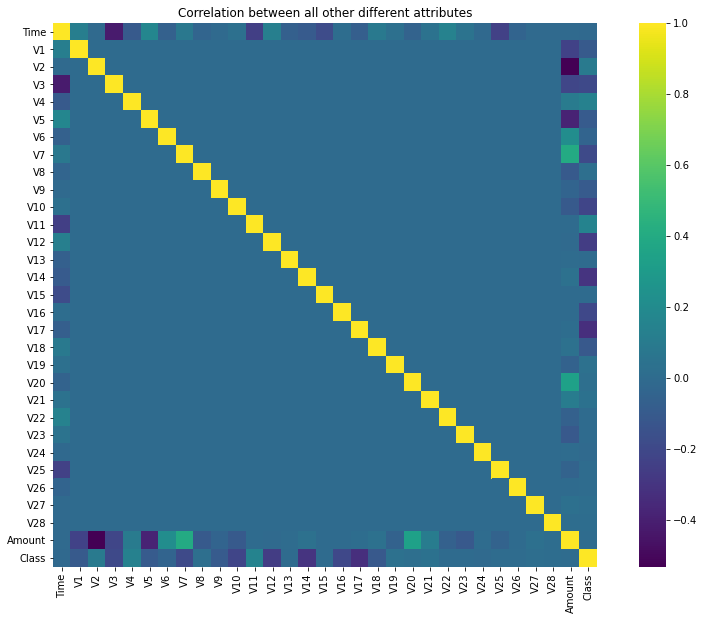

In [11]:
# plot heat map to check correlation
pyplot.figure(figsize=(15,10))

sns.heatmap(df.corr(), vmax=1, square=True,cmap='viridis')
pyplot.title('Correlation between all other different attributes')
pyplot.show()

In [12]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [13]:
name = ['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class']

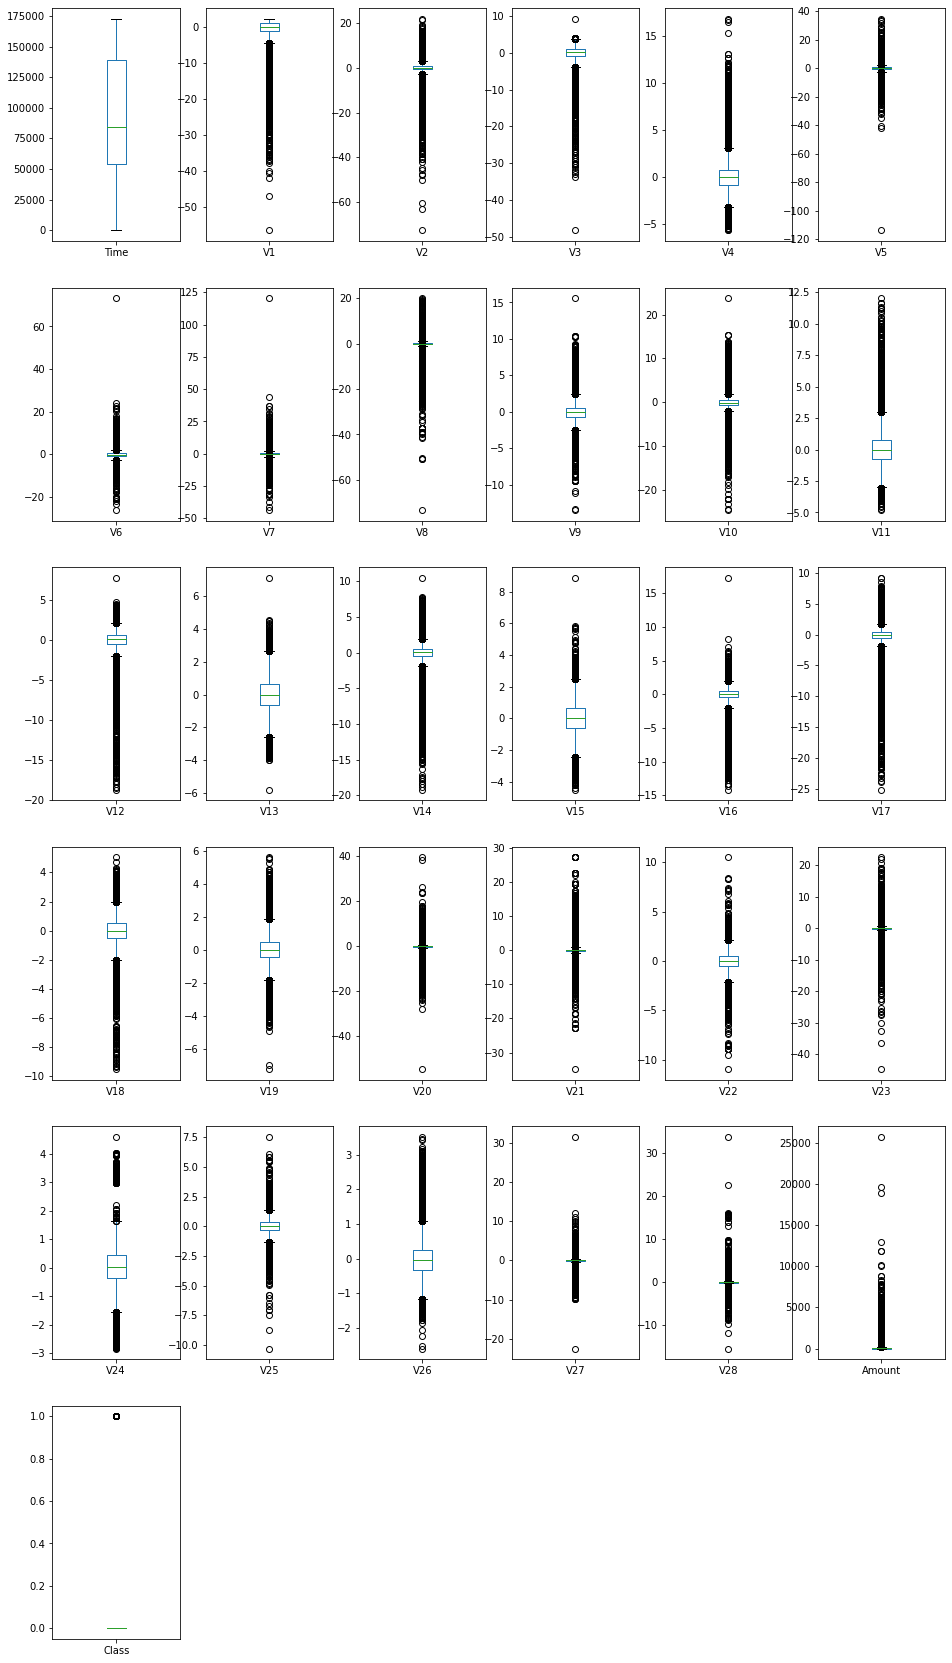

In [14]:
#check outliers using box and whisker plot

df.plot(kind='box',subplots = True, layout=(6,6), sharex=False, figsize=(16, 30))
pyplot.show()

### Univariate Analysis

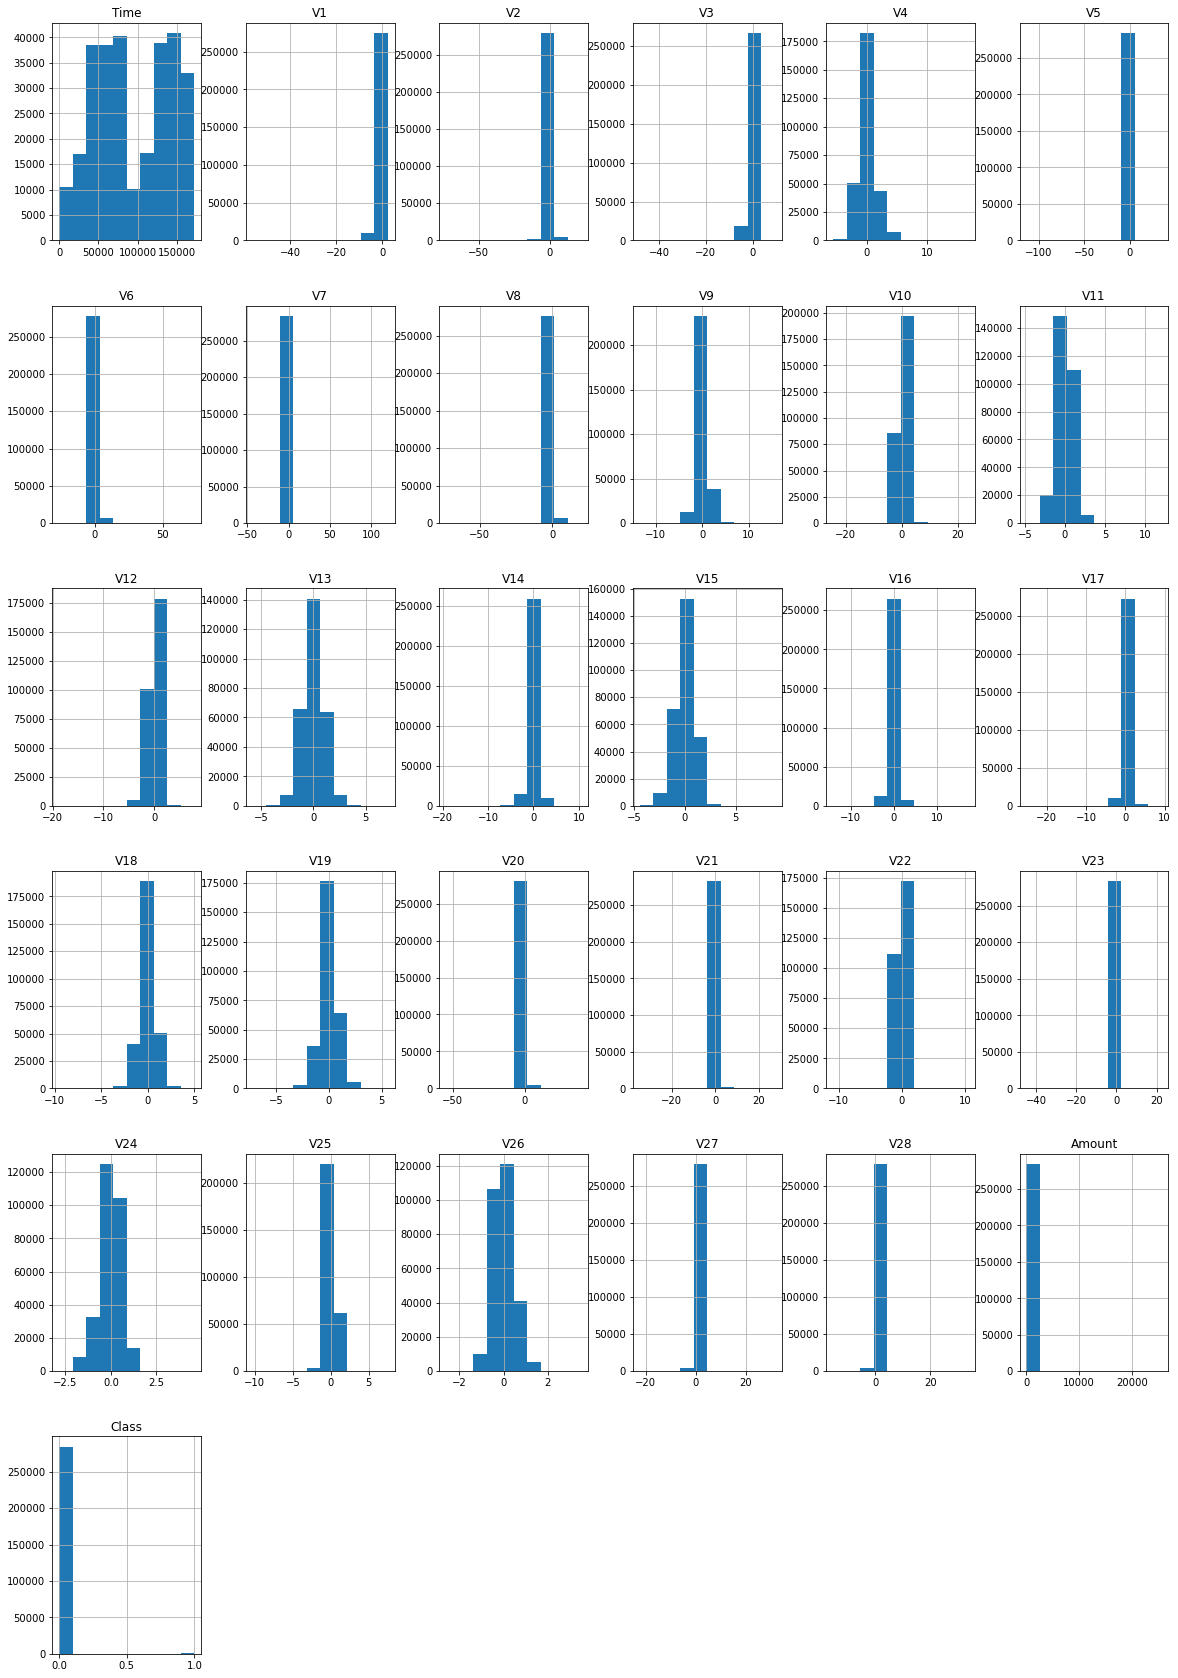

In [15]:
df.hist(figsize=(20, 30))
pyplot.show()

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Time', ylabel='Density'>

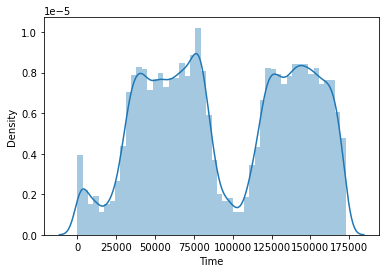

In [16]:
sns.distplot(df['Time'])

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Amount', ylabel='Density'>

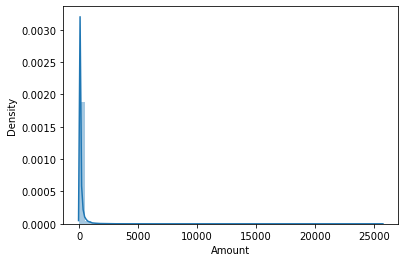

In [17]:
sns.distplot(df['Amount'])

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Class', ylabel='Density'>

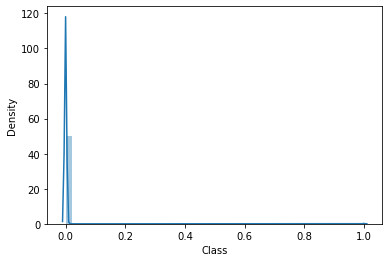

In [18]:
sns.distplot(df['Class'])

Text(0.5, 1.0, 'Ratio of Fraud Vs NotFraud')

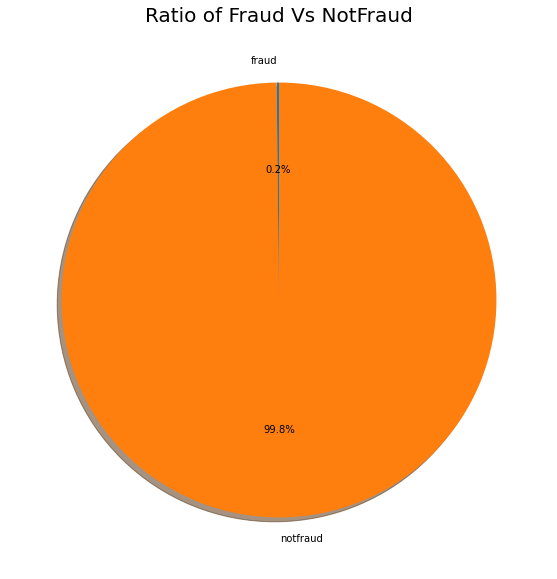

In [19]:
fraud = len(df[df['Class']==1])
notfraud = len(df[df['Class']==0])

pyplot.figure(figsize=(15,10))

labels = 'fraud','notfraud'
sizes = [fraud,notfraud]

pyplot.pie(sizes, labels = labels,autopct='%1.1f%%', shadow=True, startangle=90)
pyplot.title('Ratio of Fraud Vs NotFraud', fontsize=20)
#sns.set_context("paper", font_scale=2)


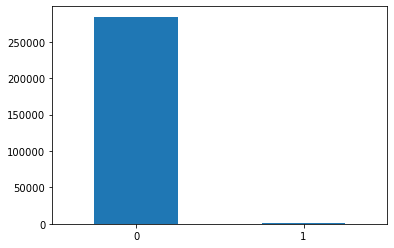

In [20]:
count_class = pd.value_counts(df['Class'], sort=True)


count_class.plot(kind='bar',rot=0)

pyplot.show()


#### Data Preparation For Model Building

In [21]:
#Separating our data into Dependent and Independent variables

X = df.drop('Class',axis=1)
y = df['Class']

In [22]:
from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics
from sklearn.metrics import precision_score, recall_score, precision_recall_curve,f1_score, fbeta_score, accuracy_score

In [23]:
# setting up testing and training sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=27) 

#### Using Dummy Classifier to verify the inbalance data output


In [24]:
from sklearn.dummy import DummyClassifier

In [25]:
# DummyClassifier will end up predicting only target 0
dummy = DummyClassifier(strategy='most_frequent').fit(X_train, y_train)
dummy_pred = dummy.predict(X_test)

# checking unique labels
print('Unique predicted labels: ', np.unique(dummy_pred))

# checking accuracy
print('Test score: ', accuracy_score(y_test, dummy_pred))

Unique predicted labels:  [0]
Test score:  0.9981461194910255


In [26]:
# concatenate our training data back together
X = pd.concat([X_train, y_train], axis=1)
X.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
264873,161634.0,-0.40,1.49e+00,-0.83,-0.22,0.37,-1.45,0.80,-0.06,0.34,...,2.32e-01,0.96,-0.17,-0.04,-0.31,-0.17,6.47e-02,-3.70e-02,2.74,0
163821,116237.0,1.95,2.31e-03,-1.76,1.23,0.52,-0.65,0.50,-0.20,0.12,...,8.63e-02,0.33,-0.07,-0.42,0.43,-0.49,-3.13e-02,-7.25e-02,38.44,0
72083,54557.0,1.11,-1.66e-01,0.57,0.68,-0.26,0.64,-0.44,0.36,0.44,...,9.07e-03,0.29,-0.03,-0.24,0.39,0.48,1.07e-02,-8.40e-03,1.00,0
196949,131771.0,1.81,9.61e-01,-1.72,4.09,0.94,-0.23,0.15,0.07,-1.07,...,-1.38e-01,-0.45,0.10,-0.66,-0.15,-0.10,-2.97e-05,1.76e-02,37.89,0
126213,77959.0,0.84,-1.19e+00,0.58,0.59,-1.24,0.19,-0.53,0.06,-0.73,...,-7.23e-02,-0.11,-0.31,0.01,0.46,-0.24,3.18e-02,6.09e-02,237.00,0


#### Upsampling

In [27]:
# separate minority and majority classes
from sklearn.utils import resample

not_fraud = X[X.Class==0]
fraud = X[X.Class==1]

# upsample minority
fraud_upsampled = resample(fraud,
                          replace=True, # sample with replacement
                          n_samples=len(not_fraud), # match number in majority class
                          random_state=27) # reproducible results

# combine majority and upsampled minority
upsampled = pd.concat([not_fraud, fraud_upsampled])

# check new class counts
upsampled.Class.value_counts()

1    213245
0    213245
Name: Class, dtype: int64

In [28]:
# trying logistic regression with the balanced dataset

from sklearn.linear_model import LogisticRegression

y_train = upsampled.Class
X_train = upsampled.drop('Class', axis=1)

upsampled = LogisticRegression(solver='liblinear').fit(X_train, y_train)

upsampled_pred = upsampled.predict(X_test)

In [29]:
# Checking accuracy
accuracy_score(y_test, upsampled_pred)

0.9807589674447347

In [30]:
from sklearn.metrics import classification_report

print('Logistic Regression classification_report')

print('...'*10)

print(classification_report(y_test,upsampled_pred))

Logistic Regression classification_report
..............................
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     71070
           1       0.08      0.87      0.14       132

    accuracy                           0.98     71202
   macro avg       0.54      0.93      0.57     71202
weighted avg       1.00      0.98      0.99     71202



In [31]:
from sklearn.metrics import confusion_matrix


pd.DataFrame(confusion_matrix(y_test, upsampled_pred))

,0,1
0,69717,1353
1,17,115


#### DownSampling

In [32]:
# using our separated classes fraud and not_fraud from above

# downsample majority
not_fraud_downsampled = resample(not_fraud,
                                replace = False, # sample without replacement
                                n_samples = len(fraud), # match minority n
                                random_state = 27) # reproducible results

# combine minority and downsampled majority
downsampled = pd.concat([not_fraud_downsampled, fraud])

# checking counts
downsampled.Class.value_counts()

1    360
0    360
Name: Class, dtype: int64

In [33]:
# trying logistic regression again with the undersampled dataset

y_train = downsampled.Class
X_train = downsampled.drop('Class', axis=1)

undersampled = LogisticRegression(solver='liblinear').fit(X_train, y_train)

undersampled_pred = undersampled.predict(X_test)

In [34]:
undersampled_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [35]:
# Checking accuracy
accuracy_score(y_test, undersampled_pred)

0.9758574197354007

In [36]:
print(classification_report(y_test,undersampled_pred))

pd.DataFrame(confusion_matrix(y_test, undersampled_pred))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99     71070
           1       0.06      0.86      0.12       132

    accuracy                           0.98     71202
   macro avg       0.53      0.92      0.55     71202
weighted avg       1.00      0.98      0.99     71202



,0,1
0,69369,1701
1,18,114


In [37]:
# SMOTE(SMOTE or Synthetic Minority Oversampling Technique
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=27)
X_train, y_train = sm.fit_resample(X_train, y_train)

In [38]:
smote = LogisticRegression(solver='liblinear').fit(X_train, y_train)

smote_pred = smote.predict(X_test)

# Checking accuracy
accuracy_score(y_test, smote_pred)

0.9758574197354007

In [39]:
pd.DataFrame(confusion_matrix(y_test, smote_pred))

,0,1
0,69369,1701
1,18,114


#### RandomForestClassifier

In [40]:
from sklearn.ensemble import RandomForestClassifier

randf = RandomForestClassifier(n_estimators=10).fit(X_train, y_train)

# predict on test set
randf_pred = randf.predict(X_test)

accuracy_score(y_test, randf_pred)

0.9745231875509115

In [41]:
pd.DataFrame(confusion_matrix(y_test, randf_pred))

,0,1
0,69274,1796
1,18,114


#### Naive_bayes

In [42]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb_best = gnb.fit(X_train, y_train)
gnb_pred = gnb_best.predict(X_test)

In [43]:
accuracy_score(y_test, gnb_pred)

0.9875284402123535

In [44]:
pd.DataFrame(confusion_matrix(y_test, gnb_pred))

,0,1
0,70217,853
1,35,97


#### Support Vector Classifier

Use GridSearchCV-

In [45]:
from sklearn import svm
from sklearn.model_selection import GridSearchCV

C = [1]
gammas = [0.001, 0.1]
param_grid = dict(C=C, gamma=gammas)

svm1 = svm.SVC(kernel='rbf', probability=True)
svm_grid = GridSearchCV(svm1, param_grid, cv=5, scoring='roc_auc', verbose=10, n_jobs=-1)
svm_grid.fit(X_train, y_train)

Fitting 5 folds for each of 2 candidates, totalling 10 fits


GridSearchCV(cv=5, estimator=SVC(probability=True), n_jobs=-1,
             param_grid={'C': [1], 'gamma': [0.001, 0.1]}, scoring='roc_auc',
             verbose=10)

In [46]:
grid_pred = svm_grid.predict(X_test)
accuracy_score(y_test, grid_pred)

0.9465324007752591

#### ROC-AUC

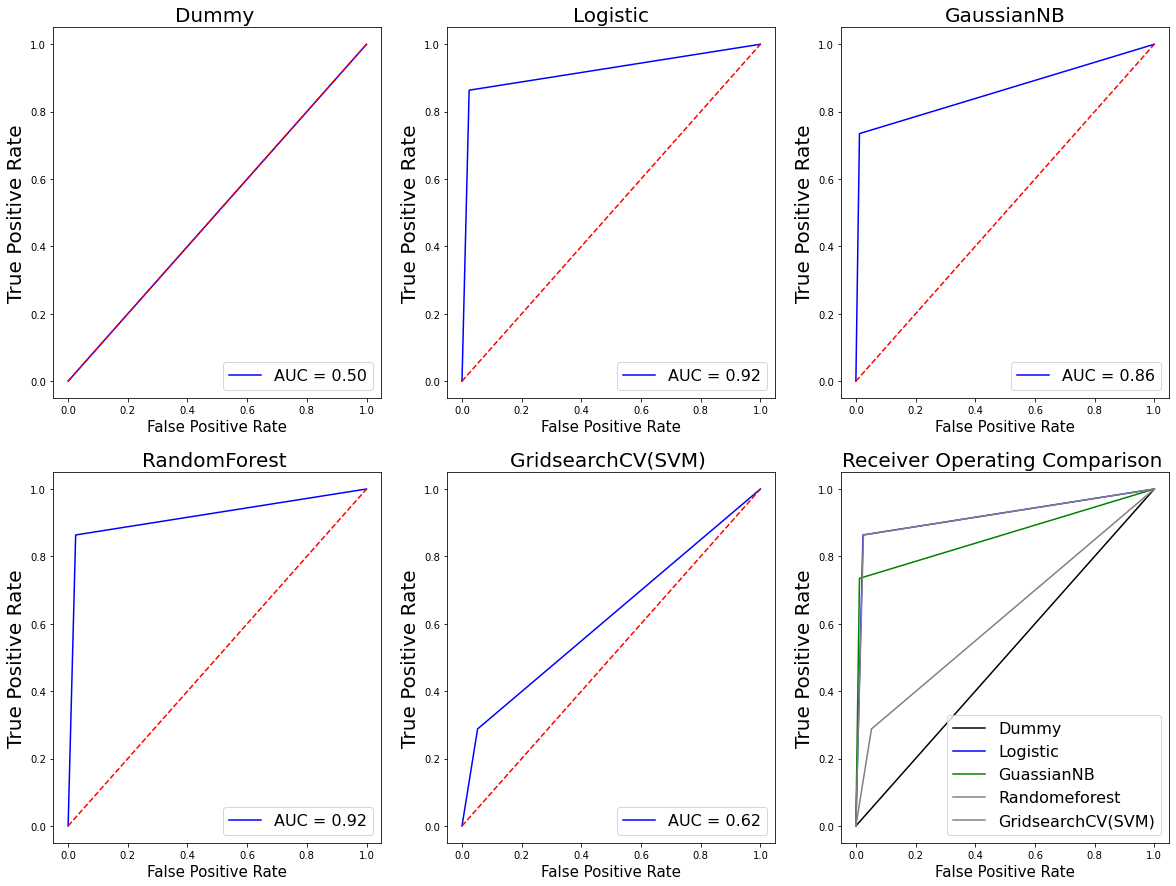

In [51]:
fig, ax_arr = pyplot.subplots(nrows = 2, ncols = 3, figsize = (20,15))


#----------Dummy---------
dummy_pred = dummy.predict(X_test)
fprdm, tprdm, thresholddm = metrics.roc_curve(y_test,dummy_pred)
roc_aucxgb = metrics.auc(fprdm,tprdm)

ax_arr[0,0].plot(fprdm,  tprdm, 'b', label = 'AUC = %0.2f' % roc_aucxgb)
ax_arr[0,0].plot([0, 1], [0, 1],'r--')
ax_arr[0,0].set_title('Dummy ',fontsize=20)
ax_arr[0,0].set_ylabel('True Positive Rate',fontsize=20)
ax_arr[0,0].set_xlabel('False Positive Rate',fontsize=15)
ax_arr[0,0].legend(loc = 'lower right', prop={'size': 16})

#----------Logistics---------

undersampled_pred = undersampled.predict(X_test)
fprlog, tprlog, thresholdlog = metrics.roc_curve(y_test, undersampled_pred)
roc_aucxgb = metrics.auc(fprlog, tprlog)

ax_arr[0,1].plot(fprlog, tprlog, 'b', label = 'AUC = %0.2f' % roc_aucxgb)
ax_arr[0,1].plot([0, 1], [0, 1],'r--')
ax_arr[0,1].set_title('Logistic',fontsize=20)
ax_arr[0,1].set_ylabel('True Positive Rate',fontsize=20)
ax_arr[0,1].set_xlabel('False Positive Rate',fontsize=15)
ax_arr[0,1].legend(loc = 'lower right', prop={'size': 16})


#----------GaussianNB---------

gnb_pred = gnb_best.predict(X_test)
#preds = probs[:,1]
fprgnb, tprgnb, thresholdgnd = metrics.roc_curve(y_test, gnb_pred)
roc_aucxgb = metrics.auc(fprgnb, tprgnb)


ax_arr[0,2].plot(fprgnb, tprgnb, 'b', label = 'AUC = %0.2f' % roc_aucxgb)
ax_arr[0,2].plot([0, 1], [0, 1],'r--')
ax_arr[0,2].set_title('GaussianNB',fontsize=20)
ax_arr[0,2].set_ylabel('True Positive Rate',fontsize=20)
ax_arr[0,2].set_xlabel('False Positive Rate',fontsize=15)
ax_arr[0,2].legend(loc = 'lower right', prop={'size': 16})


#----------Random Forest---------


randf_pred = randf.predict(X_test)
#preds = probs[:,1]
fprfst, tprfst, thresholdfst = metrics.roc_curve(y_test, randf_pred)
roc_aucxgb = metrics.auc(fprfst, tprfst)


ax_arr[1,0].plot(fprfst, tprfst, 'b', label = 'AUC = %0.2f' % roc_aucxgb)
ax_arr[1,0].plot([0, 1], [0, 1],'r--')
ax_arr[1,0].set_title('RandomForest ',fontsize=20)
ax_arr[1,0].set_ylabel('True Positive Rate',fontsize=20)
ax_arr[1,0].set_xlabel('False Positive Rate',fontsize=15)
ax_arr[1,0].legend(loc = 'lower right', prop={'size': 16})


#----------GridsearchCV(SVM)---------


grid_pred = svm_grid.predict(X_test)
fprgsv, tprgsv, thresholdgsv = metrics.roc_curve(y_test, grid_pred )
roc_aucxgb = metrics.auc(fprgsv,  tprgsv)


ax_arr[1,1].plot(fprgsv,  tprgsv, 'b', label = 'AUC = %0.2f' % roc_aucxgb)
ax_arr[1,1].plot([0, 1], [0, 1],'r--')
ax_arr[1,1].set_title('GridsearchCV(SVM) ',fontsize=20)
ax_arr[1,1].set_ylabel('True Positive Rate',fontsize=20)
ax_arr[1,1].set_xlabel('False Positive Rate',fontsize=15)
ax_arr[1,1].legend(loc = 'lower right', prop={'size': 16})


#----------ALL---------


ax_arr[1,2].plot(fprdm, tprdm, 'b', label = 'Dummy', color='black')
ax_arr[1,2].plot(fprlog, tprlog, 'b', label = 'Logistic', color='blue')
ax_arr[1,2].plot(fprgnb, tprgnb, 'b', label = 'GuassianNB', color='green')
ax_arr[1,2].plot(fprfst, tprfst, 'b', label = 'Randomeforest', color='grey')
ax_arr[1,2].plot(fprgsv,  tprgsv, 'b', label = 'GridsearchCV(SVM)', color='grey')
ax_arr[1,2].set_title('Receiver Operating Comparison ',fontsize=20)
ax_arr[1,2].set_ylabel('True Positive Rate',fontsize=20)
ax_arr[1,2].set_xlabel('False Positive Rate',fontsize=15)
ax_arr[1,2].legend(loc = 'lower right', prop={'size': 16})

## Area under the curve is about 92% in LR and RF